# Introducing Dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Dropout,Flatten,Dense
import os
import numpy as np
import matplotlib.pyplot as plt

#  Data Preprocessing

In [2]:
#download Cifar-10 dataset
(x_train,y_train), (x_test, y_test) = datasets.cifar10.load_data()
#print the size of the dataset
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(y_train[0])
#Convert the category label into onehot encoding 
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)
y_train[0]

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
[6]


array([6], dtype=uint8)

In [3]:
y_train_onehot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [4]:
#Create a image tag list
category_dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',
 6:'frog',7:'horse',8:'ship',9:'truck'}

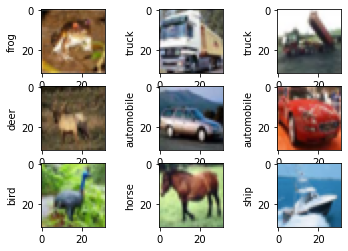

In [5]:
#Show the first 9 images and their labels
plt.figure()
for i in range(9):
 #create a figure with 9 subplots
 plt.subplot(3,3,i+1)
 #show an image
 plt.imshow(x_train[i])
 #show the label
 plt.ylabel(category_dict[y_train[i][0]])
plt.show()

# Pixel normalization


In [6]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# building model



In [7]:
def CNN_classification_model(input_size = x_train.shape[1:]):

 model = Sequential() 
 #the first block with 2 convolutional layers and 1 maxpooling layer
 '''Conv1 with 32 3*3 kernels 
 padding="same": it applies zero padding to the input image so that the input image gets 
 fully covered by the filter and specified stride.
 It is called SAME because, for stride 1 , the output will be the same as the input.
 output: 32*32*32'''
 model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_size)) 
 #relu activation function
 model.add(Activation('relu')) 
 #Conv2
 model.add(Conv2D(32, (3, 3))) 
 model.add(Activation('relu')) 
 #maxpooling 
 model.add(MaxPooling2D(pool_size=(2, 2),strides =1)) 
 #the second block
 model.add(Conv2D(64, (3, 3), padding='same')) 
 model.add(Activation('relu')) 
 model.add(Conv2D(64, (3, 3))) 
 model.add(Activation('relu')) 
 #maxpooling.the default strides =1
 model.add(MaxPooling2D(pool_size=(2, 2))) 
 
 #Before sending a feature map into a fully connected network, it should be flattened into a column vector. 
 model.add(Flatten()) 
 #fully connected layer
 model.add(Dense(128)) 
 model.add(Activation('relu')) 
 #dropout layer.every neuronis set to 0 with a probability of 0.25
 model.add(Dropout(0.25))
 model.add(Dense(num_classes))
 #map the score of each class into probability
 model.add(Activation('softmax')) 
 
 opt = keras.optimizers.Adam(lr=0.0001)
 
 model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 
 return model


In [8]:
model=CNN_classification_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        18496     
                                                        

#  Model Training

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_name = "final_cifar10.h5"
model_checkpoint = ModelCheckpoint(model_name, monitor='loss',verbose=1, save_best_only=True)


In [13]:
#load pretrained models
trained_weights_path = 'cifar10_weights.h5'
if os.path.exists(trained_weights_path):
 model.load_weights(trained_weights_path, by_name =True)
#train
model.fit(x_train,y_train, batch_size=32, epochs=10,callbacks = [model_checkpoint],verbose=1)

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 0.3145 - accuracy: 0.8849
Epoch 1: loss improved from 0.34226 to 0.31450, saving model to final_cifar10.h5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3145 - accuracy: 0.8849
Epoch 2/10
1561/1563 [============================>.] - ETA: 0s - loss: 0.2787 - accuracy: 0.8992
Epoch 2: loss improved from 0.31450 to 0.27882, saving model to final_cifar10.h5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.2788 - accuracy: 0.8991
Epoch 3/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.2708 - accuracy: 0.9031
Epoch 3: loss improved from 0.27882 to 0.27079, saving model to final_cifar10.h5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.2708 - accuracy: 0.9031
Epoch 4/10
1557/1563 [============================>.] - ETA: 0s - loss: 0.2510 - accuracy: 0.9099
Epoch 4: loss improved from 0.27079 to 0.25161, saving model to final_cifar10.h5
1563/156

# 5 Model Evaluation

In [15]:
new_model = CNN_classification_model()
new_model.load_weights('final_cifar10.h5')
model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 1.4448 - accuracy: 0.7209


[1.4447673559188843, 0.7208999991416931]

In [19]:
# from tensorflow.keras.models import load_model
# new_model_ = load_model('final_cifar10.h5')
# # new_model_.summary()
# new_model_.evaluate(x_test, y_test, verbose=1)

In [24]:
#output the possibility of each class
new_model.predict(x_test[0:1])


1/1 [==============================] - 0s 21ms/step


array([[2.5063994e-08, 2.7426104e-12, 2.2281114e-08, 9.6004981e-01,
        8.2595965e-14, 3.8131572e-02, 6.9456751e-04, 4.0251072e-10,
        1.1241044e-03, 4.7632739e-08]], dtype=float32)

In [23]:
import numpy as np
y_pred = new_model.predict(x_test)
y_classes = np.argmax(y_pred, axis=1)
y_classes[0:1]

313/313 [==============================] - 1s 2ms/step


array([3])

# visualize the out prediction

1/1 [==============================] - 0s 18ms/step


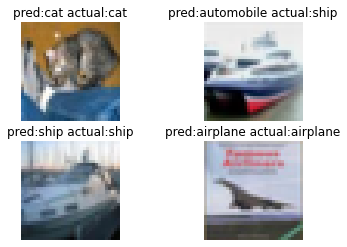

In [29]:
#label list
pred_list = []
plt.figure()
for i in range(0,4):
 plt.subplot(2,2,i+1)
 #plot
 plt.imshow(x_test[i])
 #predict
 pred = new_model.predict(x_test[0:10])
 pred= np.argmax(y_pred, axis=1)
 pred_list.append(pred)
 #Display actual and predicted labels of images
 plt.title("pred:"+category_dict[pred[i]]+" actual:"+ category_dict[y_test[i][0]])
 plt.axis('off')
plt.show()